# Analyzing the COVID-19 Mortality Rate with respect to Different Variables

*$\color{gray}{\text{ "What factors will create significant impacts on the COVID-19 mortality rate? And how?" }}$*

### Examine the Relation between the COVID-19 Mortality Rate and Confirmation Count, Death Count, Countries and their Individual Wealth, Omicron Proportion

------
*Chenxu Robin Mao | robin.mao@mail.utoronto.ca | 2023-02-25 Proejct 2 Version*


##### Data source
> COVID-19 Global Confirmation/Death: *https://github.com/CSSEGISandData/COVID-19*

> Global Population: *https://data.worldbank.org/indicator/SP.POP.TOTL*

> COVID-19 Variants: *https://www.kaggle.com/datasets/gpreda/covid19-variants*

> GDP per Capita: *https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*

> GDP: *https://data.worldbank.org/indicator/NY.GDP.MKTP.CD*

> Dictatorship Index: *https://www.kaggle.com/datasets/mathurinache/democracy-dictatorship-index*

> Country Code: *https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes*

> Literacy Rate: *https://data.worldbank.org/indicator/SE.ADT.LITR.ZS*

> US State GDP: *https://www.kaggle.com/datasets/davidbroberts/us-gdp-by-state-19972020*

<br>


-----
## Outline
*(The initial structure would be more linear. However, it was altered for marking purpose.)*

<br>

- [**Preparation**](#Preparation)

    - [Module Installation](#Module-Installation)
    - [Libraries Loading](#Libraries-Loading)
    - [Data Set Loading](#Data-Set-Loading)

    <br>

- [**Project One**](#project-one)
    - [**Introduction**](#introduction)

    <br>

    - [**Data Cleaning**](#data-cleaning)

        - [COVID-19 Mortality Rate, Confirmation Count and Death Count](#data-cleaning:-covid-19-mortality-rate,-confirmation-count-and-death-count)
        - [Mortality Rate in Different Countries](#data-cleaning-mortality-rate-in-different-countries)
        - [The Relation between GDP per Capita and Mortality Rate](#data-cleaning-the-relation-between-gdp-per-capita-and-mortality-rate)
        - [Omicron Variant Proportion and the Mortality Rate](#data-cleaning-omicron-variant-proportion-and-the-mortality-rate)
    
    <br>

    - [**Summary Statistics Tables**](#summary-statistics-tables)

        - [COVID-19 Mortality Rate, Confirmation Count and Death Count](#summary-statistics-table-seasonal-confirmation-count-death-count-and-mortality-rate)
        - [Mortality Rate in Different Countries](#summary-statistics-table-mortality-rate-in-different-countries)
        - [The Relation between GDP per Capita and Mortality Rate](#data-cleaning-the-relation-between-gdp-per-capita-and-mortality-rate)
        - [Omicron Variant Proportion and the Mortality Rate](#summary-statistics-table-omicron-variant-proportion)

    <br>

    - [**Plots, Histograms, Figures**](#plots,-histograms,-figures)
    
        - [COVID-19 Mortality Rate, Confirmation Count and Death Count](#plot-seasonal-confirmation-count-death-count-and-mortality-rate)
        - [Mortality Rate in Different Countries](#plot-mortality-rate-in-different-countries)
        - [The Relation between GDP per Capita and Mortality Rate](#plot-the-relation-between-gdp-per-capita-and-mortality-rate)
        - [Omicron Variant Proportion and the Mortality Rate](#plot-omicron-proportion-and-mortality-rate)

    <br>
    

- [**Project Two**](#project-two)

    - [**The Message**](#the-message)

        - [**Data Cleaning**](#project-two-data-cleaning)

            - [The Role of GDP regarding the Mortality Rate among Countries](#data-cleaning-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Governmental Mode regarding the Mortality Rate among Countries](#data-cleaning-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Literacy Rate regarding the Mortality Rate among Countries](#data-cleaning-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

        - [**Plots**](#project-two-plts)

            - [The Role of GDP regarding the Mortality Rate among Countries](#plots-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Governmental Mode regarding the Mortality Rate among Countries](#plot-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
            - [The Role of Literacy Rate regarding the Mortality Rate among Countries](#plots-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

    <br>

    - [**Maps and Interpretations**](#maps-and-interpretations)

        - [High GDP Countries Distribution](#map-countries-with-high-gdp)

        - [Mortality Rate Color Map with High GDP](#map-mortality-rate-distribution-color-map)
        
        - [GDP vs Mortality Rate in Mainland USA](#map-mortality-rate-vs-state-gdp-in-the-usa)

    <br>

- [**Project Three**](#project-three)

    - [**Conclusion**](#conclusion)

    - [**References**](#references)

    <br>

<br>

------
# Preparation

<br>

### Module Installation

In [202]:
# uncomment following line to install
# ! pip install --upgrade pip
# ! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
# ! pip install matplotlib
# ! pip install qeds
# ! pip install geopandas

This part is for module installation purposes.

<br>

### Libraries Loading

In [203]:
# import pandas data module
import pandas as pd

# import geographic module
import geopandas as gpd

# import graphing module
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# import Point for geo-graphing
from shapely.geometry import Point

This part is for libraries installation purpose.

<br>

### Data Set Loading

Let us begin with data loading and take a glimpse at the first five rows.

*notice: github data updates daily.*

In [204]:
# data on global COVID-19 confirmation count
global_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# data on global COVID-19 mortality count
global_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# world population data
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')

# GDP per capita data
GDP = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4888903.csv', on_bad_lines='skip')

# global variants data
variants = pd.read_csv('covid-variants.csv')

# take a glimpse at the first five rows of the global_confirm data
global_confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


As we can see from above, the *global_confirm* data set consists of numerous variables *province/state name*, *latitude*, *cumulative confirmation count on a specific date*, etc.

The Y-variable is *the COVID-19 mortality rate*, and the X-variable varies among the topics. We will state the X-variable when we get into the detailed topics. 

<br>

---------
# Project One

Project 1 consists of five research questions.
They can be easily accessed in the outline [here](#outline).

## Introduction

To date, the COVID-19 epidemic is still a major global concern. With recent data shows the COVID-19 confirmation toll reaching 671M with the total death toll of 6.83M $^{(1)}$. Different governmental institutions around the globe have brought up various policies to ensure public health; however, the distortion brought by the virus is irreversible. Thus, with the data provided by Johns Hopkins University, the World Bank and Kaggle, this report is going to investigate the relations between the COVID-19 mortality rate and certain variables, including COVID-19 confirmation count, death count, countries and their individual wealth and omicron proportion (terms will be formally defined later).

Throughout this report, the y variable will be the COVID-19 mortality rate. As being infected by COVID-19 is not as terrible as getting lethal result. Instead of mortality count, mortality rate is chosen as count is not as representative in terms of variables such as *countries* there exist different population base; as well as mortality rate will be a more challenging topic as it requires more intra-dataset calculations.

The choice of x variables includes confirmation count, death count, countries, omicron proportion. They will vary among the topics and will be introduced in detail and defined in each section. The goal of this report is to find factors that will create significant impacts on the y variable, and analyse their relation if so, or, rephrased as a research question, **"What factors will create significant impacts on the COVID-19 mortality rate?"**

To ensure precision and integrity, more detailed summaries are broken down and given in the beginning of each section with definition, including *how they are related to the research question, why they are important for the analysis, etc.*

The research questions of project 1 includes:

- [Do there exist similar trends between confirmation count and mortality rate? How about death count and mortality rate?](#project-one-COVID-19-mortality-rate,-confirmation-count-and-death-count)

- [Does mortality rate vary among countries?](#project-one-mortality-rate-in-different-countries)

- [What is the relation between GDP per capita and the COVID-19 mortality rate?](#project-one-the-relation-between-gdp-per-capita-and-mortality-rate)

- [Do countries with higher omicron variant proportion have a higher mortality rate?](#project-one-omicron-variant-proportion-and-the-mortality-rate)

Detailed explaination, goals and variables are explained in the following section. However, you can skip to the data cleaning section by clicking [here](#data-cleaning).

<br>

-----
### Project One: COVID-19 Mortality Rate, Confirmation Count and Death Count

*$\color{blue}{\text{ "Do there exist similar trends between confirmation count and mortality rate? How about death count and mortality rate?"}}$*

Let us give definitions first.


> $\color{red}{\text{ COVID-19 Mortality Rate}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality.

> $\color{red}{\text{ Confirmation Number}}$: the population count of clinical diagonsed infected individuals. Can be referred to as *"Case Count"*, *"Confirm Count"*, etc.


The x variables here are **confirmation count** and **death count**. We are going to analyze their relations with the mortality rate. I chose two analyze two relations together as confirmation count and death count are highly related (and similar to some point), and we can examine the relation between the two x variables as a byproduct which could be helpful towards future projects.

Confirmation count is chosen as an x variable since individuals must be contagious with COVID-19 to have a mortal probability (although not necessary clinical diagnosed positive); Thus data might show a somewhat significant relation between the mortality rate and the confirmation count. The relationship would be **the mortality rate will increase overtime as the confirmation count rises, vice versa**. 

The death count is chosen as another x variable because if we hold the population fixed, once the death count goes up, by definition there will be a rise in the mortality rate. A relation might exists between the two, and their trend that **the mortality rate will rise as the death count rises over time**.

Contents:
- Data Cleaning: [here](#data-cleaning-covid-19-mortality-rate-confirmation-count-and-death-count)
- Summary Statistics Table: [here](#summary-statistics-table-seasonal-confirmation-count-death-count-and-mortality-rate)
- Plot: [here](#plot-seasonal-confirmation-count-death-count-and-mortality-rate)

<br>

### Project One: Mortality Rate in Different Countries

*$\color{blue}{\text{ "Does mortality rate vary among countries?"}}$*

After denying the relation between the confirmation count and mortality rate given data and concluding the relation between the death count and mortality rate, let us figure if other factors impact the mortality rate.

As different countries had different response when the epidemic arised, and it is obvious that to date some countries did a great job while some did not. A recent report shows that tere are countries like the US with 104,393,464 confirmation count to date $^{(6)}$, and there is countries like Tokelau with a confirmation count of 5. This vast difference among the categorial data is interesting.

Thus the initial assumption here is **different countries will have different mortality rates due to the variations in exogenous factors**. If so, let us determine what economic traits will result in a low mortality rate.

To calculate the individual mortality rate among different countries, we have to use the World Bank population data imported in [here](#Data-Set-Loading). We first need to clean the data set to get the variables we want.

Content:
- Data Cleaning: [here](#data-cleaning-mortality-rate-in-different-countries)
- Summary Statistics Table: [here](#summary-statistics-table-mortality-rate-in-different-countries)
- Plot: [here](#plot-mortality-rate-in-different-countries)

<br>

### Project One: The Relation between GDP per Capita and Mortality Rate

*$\color{blue}{\text{ "What is the relation between GDP per capita and the COVID-19 mortality rate?"}}$*

Why is GDP per capita chosen instead of GDP? Because GDP is not representative enough for quality of life and individual wealth, and theoretically nations with more personal wealth can provide its citizens better medical resources, public sanitization, etc.

To enhance our understanding in the topic, let us find the countries with most GDP per capita and least GDP per capita first.

Content:
- Data Cleaning: [here](#data-cleaning-the-relation-between-gdp-per-capita-and-mortality-rate)
- Summary Statistics Tables: [here](#summary-statistics-table-gdp-per-capita-and-mortality-rate)
- Plot: [here](#plot-the-relation-between-gdp-per-capita-and-mortality-rate)

<br>

### Project One: Omicron Variant Proportion and the Mortality Rate

*$\color{blue}{\text{ "Do countries with higher omicron variant proportion have a higher mortality rate?"}}$*

Let us define the new term.

| $\color{red}{\text{ Omicron Variant Proportion}}$: the estimated proportion of Omicron COVID-19 case out of the total COVID-19 confirmation count. Can be referred to as *"omicron proportion"*, etc.

To date, there exist more than 50 COVID-19 variants, according to data from John Hopkins Medicine $^{(7)}$. Each time COVID-19 mutates, it becomes more lethal or easier to spread. Thus do countries with higher omicron variant proportion have a higher mortality rate? The initial hypothesis is that **countries with a higher omicron variant proportion will have a higher mortality rate** because the omicron variant is more lethal than the initial COVID-19 virus.

The x variable here is the omicron proportion calculated from variants and the global confirmation count data set, and the y variable is the mortality proportion calculated from the global death data set and the population data set.

Content:
- Data Cleaning: [here](#data-cleaning-omicron-variant-proportion-and-the-mortality-rate)
- Summary Statistics Table: [here](#data-cleaning-omicron-variant-proportion-and-the-mortality-rate)
- Plot: [here](#plot-omicron-proportion-and-mortality-rate)

<br>

-----
## Data Cleaning

### Data Cleaning: COVID-19 Mortality Rate, Confirmation Count and Death Count

In [205]:
### get our target variable

# select all case count from thed DataFrame
global_confirm_cum = global_confirm.iloc[:,4:]
global_death_cum = global_death.iloc[:,4:]

# sum up the total case count
global_confirm_cum = global_confirm_cum.sum()
global_death_cum = global_death_cum.sum()

In this case, the X variables we used include *confirmation count*, *death count*, and the Y variable is the *mortality rate*.

After cleaning the data set, the *global_confirm_cum* data set sums up the global COVID-19 cumulative case count, and the *global_death_cum* data set sums up the global COVID-19 cumulative mortality count.

To access the next step for this question, click [here](#summary-statistics-table-seasonal-confirmation-count-death-count-and-mortality-rate).

<br>


### Data Cleaning: Mortality Rate in Different Countries

In [206]:
### data cleaning

# clean the population DataFrame
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
population = population.drop([266,267,268,269,270])
population = population.rename(columns= {'Country Name': 'Country/Region'})
population = population.loc[:,['Country/Region','2022 [YR2022]']]

### calculating table regarding each countries' mortality rate

# reset index and choose death count columns
country_death = global_death.set_index('Country/Region').iloc[:,3:]
country_total_death = country_death.loc[:,['12/23/22']]
country_total_death = country_total_death.rename(columns={'12/23/22':'Death Toll'})

# sum up duplicates(different provinces within the same country)
country_total_death = country_total_death.groupby([country_total_death.index]).sum()

# reset index
country_total_death = country_total_death.reset_index()

# merge the data sets
country_death_population = pd.merge(country_total_death, population, how = 'left', on = 'Country/Region')

# drop the na values
country_death_population = country_death_population.dropna()

# rename the column
country_death_population = country_death_population.rename(columns = {'2022 [YR2022]': 'Population'})

The x variable we are using here is **countries**, while the y variable is their individual **mortality rate**, which is calculated from the COVID-19 death data combined with the population data.

To access the next step for this question, click [here](#summary-statistics-table-mortality-rate-in-different-countries).

<br>

### Data Cleaning: The Relation between GDP per Capita and Mortality Rate

In [207]:
### data cleaning

country_death_population_GDP = country_death_population.copy()

# GDP = GDP[['Country Name']]
if len(GDP.T) >= 5:
    GDP = GDP[['Country Name', '2021']]

country_death_population_GDP = pd.merge(GDP, country_death_population_GDP, left_on='Country Name', right_on ='Country/Region',how='inner')
country_death_population_GDP = country_death_population_GDP.drop(columns='Country/Region').rename(columns={'2021':'GDP per Capita'})
country_death_population_GDP['Mortality Rate (%)'] = (country_death_population_GDP['Death Toll'].astype(int) / country_death_population_GDP['Population'].astype(int))*100

We now merged the table *country_death_population* with the GDP per capita data set.

The X variable is country and the Y variable is mortality rate.

To access the next step for this question, click [here](#summary-statistics-table-gdp-per-capita-and-mortality-rate).

<br>

### Data Cleaning: Omicron Variant Proportion and the Mortality Rate

Again, let us clean the two datasets, calculate the values and take a glimpse first.

> *The variants dataset is loaded [here](#Data-Set-Loading).*

In [208]:
### glimpse

variants.head(3)

### merge and calculate the value

country_confirm = global_confirm.set_index('Country/Region').iloc[:,3:]
country_total_confirm = country_confirm.loc[:,['12/31/20']]
country_total_confirm = country_total_confirm.rename(columns={'12/31/20':'Confirm Toll'})
country_total_confirm = country_total_confirm.groupby([country_total_confirm.index]).sum()
country_total_confirm = country_total_confirm.reset_index()
country_death_population = country_death_population.rename(columns={'Country':'Country/Region'})
country_death_confirm_population = pd.merge(country_death_population, country_total_confirm, on = 'Country/Region', how = 'inner')

variants_df = variants.loc[:,['location','date','variant']]
variants_df = variants_df.rename(columns={'location':'Country/Region','date':'Date','variant':'Type'})
omicron_df = variants_df[variants_df.Type == 'Omicron']
omicron_df = omicron_df.rename(columns={'Country/Region':'Country'})
country_death_confirm_population = country_death_confirm_population.rename(columns={'Country/Region':'Country'})

As we can see, the variants data set contains info such as location, date, variant types, sequence info, etc. Sequences and dates (which will be summed up later) are not useful towards our question thus the variables we are using from this dataset are *location and variant*.

Let us clean the data to get what we want.

In [209]:
### merge and calculate the value

country_confirm = global_confirm.set_index('Country/Region').iloc[:,3:]
country_total_confirm = country_confirm.loc[:,['12/31/20']]
country_total_confirm = country_total_confirm.rename(columns={'12/31/20':'Confirm Toll'})
country_total_confirm = country_total_confirm.groupby([country_total_confirm.index]).sum()
country_total_confirm = country_total_confirm.reset_index()
country_death_population = country_death_population.rename(columns={'Country':'Country/Region'})
country_death_confirm_population = pd.merge(country_death_population, country_total_confirm, on = 'Country/Region', how = 'inner')

variants_df = variants.loc[:,['location','date','variant']]
variants_df = variants_df.rename(columns={'location':'Country/Region','date':'Date','variant':'Type'})
omicron_df = variants_df[variants_df.Type == 'Omicron']
omicron_df = omicron_df.rename(columns={'Country/Region':'Country'})
country_death_confirm_population = country_death_confirm_population.rename(columns={'Country/Region':'Country'})

# generate a loop to compare and input data
res = []
for i in country_death_confirm_population['Country']:
    j = omicron_df[omicron_df.Country == i].count().Country.astype(int)
    res.append(j)
    if j != 0:
        country_death_confirm_population.loc[country_death_confirm_population[country_death_confirm_population.Country == i].index,'Omicron Count'] = j
    else:
        country_death_confirm_population.loc[i,'Omicron Count'] = None
        
country_death_confirm_population = country_death_confirm_population.dropna(0)
country_death_confirm_population['Omicron Prop (%)'] = (country_death_confirm_population['Omicron Count'] / country_death_confirm_population['Confirm Toll']) * 100
country_death_confirm_population['Death Toll'] = country_death_confirm_population['Death Toll'].astype(int)
country_death_confirm_population['Population'] = country_death_confirm_population['Population'].astype(int)
country_death_confirm_population['Confirm Toll'] = country_death_confirm_population['Confirm Toll'].astype(int)
country_death_confirm_population['Omicron Count'] = country_death_confirm_population['Omicron Count'].astype(int)
country_death_confirm_population.reset_index(drop=True).head(10).style.set_caption('Table: Mortality Rate and Omicron Proportion of Countries')

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_14623/3270189123.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_death_confirm_population = country_death_confirm_population.dropna(0)


,Country,Death Toll,Population,Confirm Toll,Omicron Count,Omicron Prop (%)
0,Angola,1928,35588987,17553,28,0.159517
1,Argentina,130080,46050112,1625514,44,0.002707
2,Australia,16940,25941598,28425,44,0.154793
3,Austria,21360,8970982,356063,43,0.012077
4,Bahrain,1539,1472233,92675,29,0.031292
5,Bangladesh,29438,171186372,513510,45,0.008763
6,Belgium,33228,11621253,646496,45,0.006961
7,Belize,688,405272,10776,24,0.222717
8,Benin,163,13352864,3251,14,0.430637
9,Bosnia and Herzegovina,16221,3233526,110985,36,0.032437


> Notice: Countries that are not present in both datasets are dropped.

> The variants dataset was last updated on 12/31/20; thus that is where we slice our cumulative confirmation data.

The table above gives us the mortality rate, omicron proportion and other factors of countries. 

We can tell that countries with high mortality rates such as Argentina, have relatively low omicron proportions; and countries with low mortality rates such as Benin, have high omicron proportions. This is an interesting trend, let us further visualize this.

To access the next step for this question, click [here](#summary-statistics-table-omicron-variant-proportion).


----
## Summary Statistics Tables

### Summary Statistics Table: Seasonal Confirmation Count, Death Count and Mortality Rate

To take a glimpse, let us divide the time horizon from 2020 to 2022 into 12 seasonal interval first. Let us record the seasonal change for both confirmation count and mortality count to see if there exists any visible relation between the variables. 

Personal experience suggests that the data will show a significant increase in the confirm count first, and then the change will be slowed down. The death count change will increase initially and will have a sudden drop down at some point due to mass vacciniation or herd immunology. I assume the *mortality rate will rise with the confirmation count before the sudden drop and shows no relation afterwards.*

Let us take a look at the confirmation count.

In [210]:
### Summary Statistics Table

# select seasonal case count and mortality count data from 2020 to 2022 from the source
seasonal_confirm = global_confirm[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_death = global_death[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_confirm_cum = global_confirm_cum[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

# create a new DataFrame that contains seasonal case count and mortality count data
seasonal_newcase_death = pd.DataFrame({
    '3/1/20': [sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['3/1/20'])],
    '6/1/20': [sum(seasonal_confirm['6/1/20'])-sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['6/1/20'])-sum(seasonal_death['3/1/20'])],
    '9/1/20': [sum(seasonal_confirm['9/1/20'])-sum(seasonal_confirm['6/1/20']),
                   sum(seasonal_death['9/1/20'])-sum(seasonal_death['6/1/20'])],
    '12/1/20': [sum(seasonal_confirm['12/1/20'])-sum(seasonal_confirm['9/1/20']),
                   sum(seasonal_death['12/1/20'])-sum(seasonal_death['9/1/20']),],
    
    '3/1/21': [sum(seasonal_confirm['3/1/21'])-sum(seasonal_confirm['12/1/20']),
                   sum(seasonal_death['3/1/21'])-sum(seasonal_death['12/1/20'])],
    '6/1/21': [sum(seasonal_confirm['6/1/21'])-sum(seasonal_confirm['3/1/21']),
                   sum(seasonal_death['6/1/21'])-sum(seasonal_death['3/1/21'])],
    '9/1/21': [sum(seasonal_confirm['9/1/21'])-sum(seasonal_confirm['6/1/21']),
                   sum(seasonal_death['9/1/21'])-sum(seasonal_death['6/1/21'])],
    '12/1/21': [sum(seasonal_confirm['12/1/21'])-sum(seasonal_confirm['9/1/21']),
                   sum(seasonal_death['12/1/21'])-sum(seasonal_death['9/1/21'])],
    
    '3/1/22': [sum(seasonal_confirm['3/1/22'])-sum(seasonal_confirm['12/1/21']),
                   sum(seasonal_death['3/1/22'])-sum(seasonal_death['12/1/21'])],
    '6/1/22': [sum(seasonal_confirm['6/1/22'])-sum(seasonal_confirm['3/1/22']),
                   sum(seasonal_death['6/1/22'])-sum(seasonal_death['3/1/22'])],
    '9/1/22': [sum(seasonal_confirm['9/1/22'])-sum(seasonal_confirm['6/1/22']),
                   sum(seasonal_death['9/1/22'])-sum(seasonal_death['6/1/22'])],
    '12/1/22': [sum(seasonal_confirm['12/1/22'])-sum(seasonal_confirm['9/1/22']),
                   sum(seasonal_death['12/1/22'])-sum(seasonal_death['9/1/22'])]
                       },
    index = ['new confirm', 'new death']
)

# calculate the seasonal mortality rate change
seasonal_newcase_death.loc['mortality rate (%)'] = (seasonal_newcase_death.loc['new death'] / seasonal_confirm_cum) * 100
seasonal_newcase_death = seasonal_newcase_death.T

# convert type
seasonal_newcase_death['new confirm'] = seasonal_newcase_death['new confirm'].astype(int)
seasonal_newcase_death['new death'] = seasonal_newcase_death['new death'].astype(int)

# rename index for a better view
seasonal_newcase_death.index = ['spring 2020', 'summer 2020', 'autumn 2020', 'winter 2020', 'spring 2021', 'summer 2021', 'autumn 2021', 'winter 2021', 
'spring 2022' , 'summer 2022', 'autumn 2022', 'winter 2022']

# set table caption
seasonal_newcase_death.style.set_caption('Table: Seasonal Mortality Rate and Confirmation Count from 2020 to 2022')

,new confirm,new death,mortality rate (%)
spring 2020,88402,3000,3.393588
summer 2020,6195178,406983,6.476929
autumn 2020,19518644,508255,1.969811
winter 2020,38234918,639130,0.998061
spring 2021,50846837,1084719,0.944186
summer 2021,56816155,1066379,0.621071
autumn 2021,47303623,851239,0.388687
winter 2021,44812388,696112,0.263863
spring 2022,175246419,738948,0.168301
summer 2022,91877412,323617,0.060952


> Note: It is worth mentioning that the mortality rate refers to the ratio of **new death count over cumlative confirmation count**, not death count over change in confirm count.

The chart above gives the global new confirm count and death count every season between 2020 and 2022. We can see that the seasonal confirmation change *(new confirm)* has a significant growth from  spring 2020 to spring 2022. The global mortality rate have a sudden increase in spring 2020, reaching its peak of over 6.47% around summer 2020, and is relatively stabilized since. Their increment trend does not seem to match.

The change in death count *(new death)* seems to peak around early 2021, while the mortality rate is still relatively significant. Nevertheless, the trend is too hard to tell given this table.

This quick glimpse *somehow* supports my hypotheses, however, to ensure the precision, let us further investigate with detailed data instead of seasonal data.

To access the next step for this question, click [here](#plot-seasonal-confirmation-count-death-count-and-mortality-rate).

<br>

### Summary Statistics Table: Mortality Rate in Different Countries

In [211]:
# calculate the mortality rate
country_death_population['Death Toll'] = country_death_population['Death Toll'].astype(int)
country_death_population['Population'] = country_death_population['Population'].astype(int)
country_death_population['Mortality Rate'] = country_death_population['Death Toll'] / country_death_population['Population']
country_death_population['Mortality Rate (%)'] = country_death_population['Mortality Rate'] * 100
country_death_population = country_death_population.drop('Mortality Rate', axis = 1)

country_death_population.head(10).style.set_caption('Table: the Death Toll, Population, Mortality Rate of individual Countries')

,Country/Region,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,7845,41128771,0.019074
1,Albania,3595,2800251,0.128381
2,Algeria,6881,44903225,0.015324
3,Andorra,165,79824,0.206705
4,Angola,1928,35588987,0.005417
6,Antigua and Barbuda,146,93763,0.155712
7,Argentina,130080,46050112,0.282475
8,Armenia,8712,2780469,0.313328
9,Australia,16940,25941598,0.065301
10,Austria,21360,8970982,0.238101



> Countries with no population data or with no covid report data is dropped in this session. Only countries that are present in both datasets are recorded.

> *Notice: As the world bank population data was last updated on 12/23/22, the same date is chosen to record the death toll.*

The variation in mortality rate among countries(and regions) is visible in the 10 heading of the data. For instance, Armenia has a mortality rate of 0.313328%, which is approximately 16.43 times Afghanistan's of 0.019074%. 

Let us visualize the differences.

To access the next step for this question, click [here](#plot-mortality-rate-in-different-countries).

<br>

### Summary Statistics Table: GDP per capita and Mortality Rate

In [212]:
country_death_population_GDP.head(10).style.set_caption('Countries with Different GDP per Capita and their Mortality Rate')

,Country Name,GDP per Capita,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,368.754614,7845,41128771,0.019074
1,Angola,1953.533757,1928,35588987,0.005417
2,Albania,6492.872012,3595,2800251,0.128381
3,Andorra,42137.327271,165,79824,0.206705
4,United Arab Emirates,44315.554183,2348,9441129,0.024870
5,Argentina,10636.120196,130080,46050112,0.282475
6,Armenia,4966.513471,8712,2780469,0.313328
7,Antigua and Barbuda,15781.395702,146,93763,0.155712
8,Australia,60443.109165,16940,25941598,0.065301
9,Austria,53637.705711,21360,8970982,0.238101


The table above shows the variation in mortality rate for countries with different GDP per capita. For example, we have Australia with a high GDP per capita and a low mortality rate, but somehow we have Afghanistan, with a *relatively* low mortality rate and a low GDP per capita. Thus we cannot conclude an exact trend from this data.

Let us make this into a bar plot to visualize the difference.

To access the next step for this question, click [here](#plot-the-relation-between-gdp-per-capita-and-mortality-rate).

<br>

### Summary Statistics Table: Omicron Variant Proportion 

In [213]:
# generate a loop to compare and input data
res = []
for i in country_death_confirm_population['Country']:
    j = omicron_df[omicron_df.Country == i].count().Country.astype(int)
    res.append(j)
    if j != 0:
        country_death_confirm_population.loc[country_death_confirm_population[country_death_confirm_population.Country == i].index,'Omicron Count'] = j
    else:
        country_death_confirm_population.loc[i,'Omicron Count'] = None
        
country_death_confirm_population = country_death_confirm_population.dropna(0)
country_death_confirm_population['Omicron Prop (%)'] = (country_death_confirm_population['Omicron Count'] / country_death_confirm_population['Confirm Toll']) * 100
country_death_confirm_population['Death Toll'] = country_death_confirm_population['Death Toll'].astype(int)
country_death_confirm_population['Population'] = country_death_confirm_population['Population'].astype(int)
country_death_confirm_population['Confirm Toll'] = country_death_confirm_population['Confirm Toll'].astype(int)
country_death_confirm_population['Omicron Count'] = country_death_confirm_population['Omicron Count'].astype(int)
country_death_confirm_population['Mortality Rate (%)'] = (country_death_confirm_population['Death Toll'] / country_death_confirm_population['Population']) * 100
country_death_confirm_population.reset_index(drop=True).head(10).style.set_caption('Table: Mortality Rate and Omicron Proportion of Countries')

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_14623/2415803029.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_death_confirm_population = country_death_confirm_population.dropna(0)


,Country,Death Toll,Population,Confirm Toll,Omicron Count,Omicron Prop (%),Mortality Rate (%)
0,Angola,1928,35588987,17553,28,0.159517,0.005417
1,Argentina,130080,46050112,1625514,44,0.002707,0.282475
2,Australia,16940,25941598,28425,44,0.154793,0.065301
3,Austria,21360,8970982,356063,43,0.012077,0.238101
4,Bahrain,1539,1472233,92675,29,0.031292,0.104535
5,Bangladesh,29438,171186372,513510,45,0.008763,0.017196
6,Belgium,33228,11621253,646496,45,0.006961,0.285924
7,Belize,688,405272,10776,24,0.222717,0.169763
8,Benin,163,13352864,3251,14,0.430637,0.001221
9,Bosnia and Herzegovina,16221,3233526,110985,36,0.032437,0.501651


> Notice: Countries that are not present in both datasets are dropped.

> The variants dataset was last updated on 12/31/20; thus that is where we slice our cumulative confirmation data.

The table above gives us the mortality rate, omicron proportion and other factors of countries. 

We can tell that countries with high mortality rates such as Argentina, have relatively low omicron proportions; and countries with low mortality rates such as Benin, have high omicron proportions. This is an interesting trend, let us further visualize this.

To access the next step for this question, click [here](#plot-omicron-proportion-and-mortality-rate).

<br>

----
## Plots, Histograms, Figures

### Plot: Seasonal Confirmation Count, Death Count and Mortality Rate

In [214]:
### data cleaning

# convert cumulative count to daily change and drop the first observation
global_confirm_change = global_confirm_cum.diff().drop('1/22/20')
global_death_change = global_death_cum.diff().drop('1/22/20')
global_death_cum = global_death_cum.drop('1/22/20')
global_confirm_cum = global_confirm_cum.drop('1/22/20')

# calculating the mortality rate for global data
global_death_cum.loc['mortality rate'] = global_death_change / global_confirm_cum

# magnify the data to make trend more obvious

# global_death_change is magnified by 100
global_death_change_magnified = global_death_change * 100

# mortality rate is magnified by 1000000000:
    # assume there is 1000000000 individuals, extimate how many would result in COVID-19 related death
seasonal_newcase_death_magnified = global_death_cum.loc['mortality rate'] * 1000000000

Text(0.5, 1.0, 'Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')

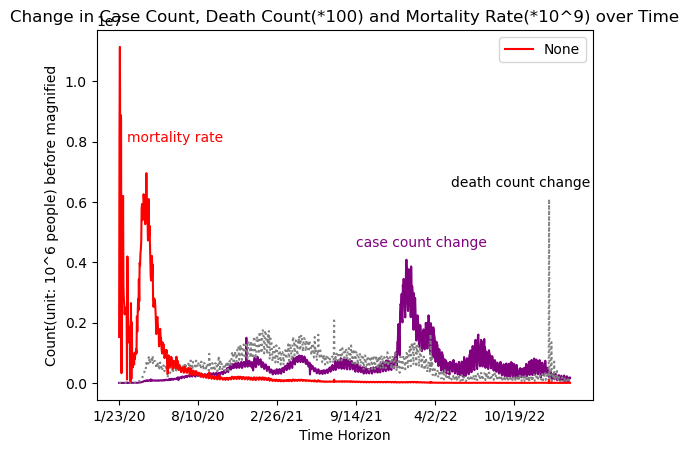

In [215]:
### plotting

# plotting
fig, ax = plt.subplots()

global_confirm_change.plot(ax=ax,legend=False,linestyle='-',color = 'purple')
ax.text(600,4500000,'case count change',color='purple')

global_death_change_magnified.plot(ax=ax,legend=False,linestyle='dotted',color = 'gray')
ax.text(840,6500000,'death count change',color='black')

seasonal_newcase_death_magnified.plot(ax=ax, legend=True, linestyle='solid',color = 'red')
ax.text(20,8000000,'mortality rate',color='red')


# set labels
ax.set_ylabel('Count(unit: 10^6 people) before magnified')
ax.set_xlabel('Time Horizon')
ax.set_title('Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')

> To analyze the trend, the death count is magnified by 100, and the mortality rate is magnified by 1 ${\times}$ $10^{9}$. This is reasonable as we are multiplying the values by a constant coefficient, and if there exists a relation (which will be unchanged after the magnification due to the nature of constant multiplication), it will be easier to tell.

The X variables chosen to test the hypotheses are death count and case count (based on time), and the Y variable is the mortality rate.

The exact daily data is graphed above. We can tell the mortality rate fluctuation ends around 8/10/20, which is before any significant fluctuation in the death change and the case change starting from the midpoint of 8/10/20 and 2/26/21. As well as the peak of the mortality rate lies between 1/23/20 and 8/10/20, while the case count peak lies between 9/14/21 and 4/2/22, and there still exist significant fluctuations after the peak.

Due to the significant distribution difference between the two variables, we can conclude that **data shows no significant relation between case count and the mortality rate**.

This can be reasoned as many countries enforced lockdowns when the mortality rate is high, resulting in a low case count, and they will end the quarantine if and only if the mortality rate is stabilized by exogenous factors such as mass vaccinations or herd immunity. For example, the Ontario government announced the end of lockdown on Nov.20, 2020 $^{(2)}$, when the mortality rate ended its fluctuation. It would be reasonable for the confirmation count to rise after people gain back rights to outside activities as there exist more social interactions, resulting in more individuals and more ways to spread the virus.


However, when the mortality rate rises between 1/23/20 and 8/10/20, the death count also has a relatively sudden increase. As the mortality rate goes down, the death count also has a downfall before 8/10/20. Thus we conclude that **a rise in the death count rate will lead to an increase in the COVID-19 mortality rate; however, there exist other factors that can result in a more significant impact (on the mortality rate)**.

[clicke here to return to the outline.](#outline)

<br>

### Plot: Mortality Rate in Different Countries

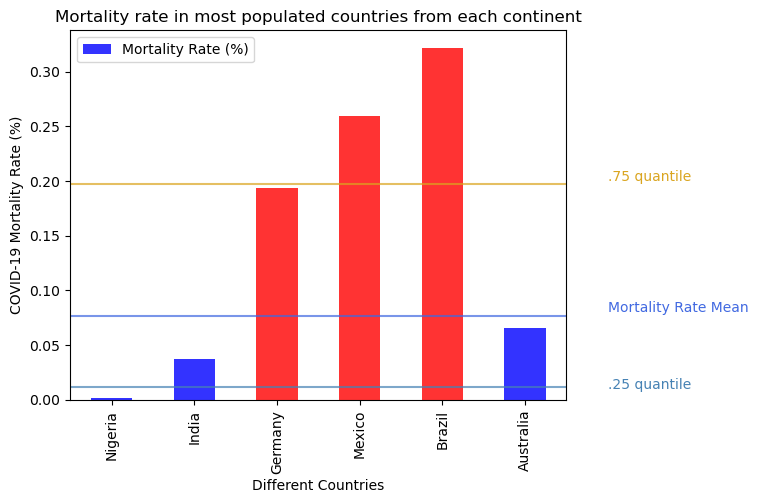

In [216]:
### plotting

# give barplot
fig, ax = plt.subplots()

# select the most populated country from each continent
country_death_population_2 = country_death_population.copy()
country_death_population_2 = country_death_population_2.reset_index(drop=True)
country_death_population_p = country_death_population_2.iloc[[115,70,58,101,22,8], :]

# calculating quantiles
quantile25 = country_death_population['Mortality Rate (%)'].quantile(.25)
quantile50 = country_death_population['Mortality Rate (%)'].quantile(.50)
quantile75 = country_death_population['Mortality Rate (%)'].quantile(.75)

country_death_population_plot = country_death_population_p.loc[:,['Country/Region','Mortality Rate (%)']]
mortality_mean = country_death_population_plot['Mortality Rate (%)'].mean()

country_death_population_plot.plot.bar(ax=ax,x='Country/Region', y='Mortality Rate (%)',alpha = 0.8, color=['b','b','r','r','r','b'])

ax.set_ylabel('COVID-19 Mortality Rate (%)')
ax.set_xlabel('Different Countries')
ax.set_title('Mortality rate in most populated countries from each continent')

plt.axline(xy1=[0,quantile25],xy2=[6,quantile25],color='steelblue',alpha=0.7)
ax.text(6,0.01,'.25 quantile',color='steelblue')

plt.axline(xy1=[0,quantile50],xy2=[6,quantile50],color = 'royalblue',alpha = 0.7)
ax.text(6,0.08,'Mortality Rate Mean',color='royalblue')

plt.axline(xy1=[0,quantile75],xy2=[6,quantile75],color='goldenrod',alpha=0.7)
ax.text(6,0.2,'.75 quantile',color='goldenrod')
plt.show()

> Remember our goal is to determine **whether the mortality rate is differed among countries.**

The barplot above visualizes the difference in mortality rate among the most populated countries in each continent. Note that the 0.75 quantile, mean and the 0.25 quantile are calculated using the initial dataset instead of the ones shown on the graph. We can see that the mortality rate is significantly higher in some countries such as Brazil, exceeding the 0.75 quantile; on the other hand, we can see Nigeria with a mortality rate lower than the 0.25 quantile. 

Thus we can see that the differentiation in mortality rate is significant; thus we can conclude that **the mortality rate does vary among different countries**. However, this still does not answer the research question -

**"But why?** Why do some countries have a large mortality rate while others can bring it down?"

For now, let us assume the epidemic is strongly related to the economic development of a nation.

Thus to further investigate this topic, let us ask another question: 

**"Does the individual wealth of a nation affect its COVID-19 mortality rate? If so, how?"**

Thus let us move further into the relation between **GDP per capita** and the **mortality rate**.

[clicke here to return to the outline.](#outline)

<br>

### Plot: the Relation between GDP per Capita and Mortality Rate

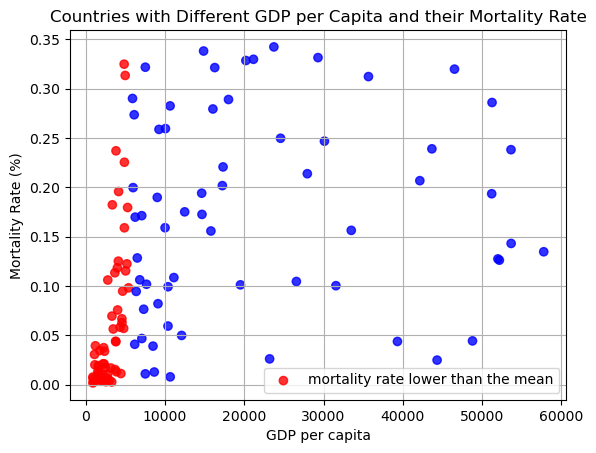

In [217]:
### give scatterplot

fig, ax = plt.subplots()

# GDP per capita quantiles
quantile25 = country_death_population_GDP['GDP per Capita'].quantile(.25)
quantile50 = country_death_population_GDP['GDP per Capita'].quantile(.50)
quantile75 = country_death_population_GDP['GDP per Capita'].quantile(.75)

# drop the outliners
country_death_population_GDP_2 = country_death_population_GDP.sort_values('Mortality Rate (%)', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_population_GDP_2 = country_death_population_GDP_2.sort_values('Mortality Rate (%)').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_population_GDP_2 = country_death_population_GDP_2.sort_values('GDP per Capita', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_population_GDP_2 = country_death_population_GDP_2.sort_values('GDP per Capita').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])

colors = ['r' if i<quantile50 else 'b' for i in country_death_population_GDP_2['GDP per Capita']]
plot = plt.scatter(x=country_death_population_GDP_2['GDP per Capita'], y=country_death_population_GDP_2['Mortality Rate (%)'], color=colors,alpha=0.8)
ax.set_label('123')
ax.grid(True)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Mortality Rate (%)')

ax.legend([plot],['mortality rate lower than the mean'])
plt.title('Countries with Different GDP per Capita and their Mortality Rate')
plt.show()

The scatterplot above visualizes the mrotality rate difference between countries with different GDP per capita. From the graph, we can see that countries with a low GDP per capita tend to have a low mortality rate, while countries with higher GDP per capita tend to have a weaker, insigifnicant relation between the two variables. 

Thus we can conclude **countries with low GDP per capita have the lowest mortality rate while countries with higher GDP per capita tend to have a insignificant relation between their GDP per capita and mortality rate.** This contridicts my initial assumption.

One way to explain this is that countries with medium GDP per capita are mainly developing countries, where people work the hardest (from my personal observation). Thus the people put less attention into health. On the other side, countries with low GDP per capita tend to have a more dictatored government where the citizens are banned from going out during the pandemic, resulting in a lower mortality rate.

[clicke here to return to the outline.](#outline)

<br>

### Plot: Omicron Proportion and Mortality Rate

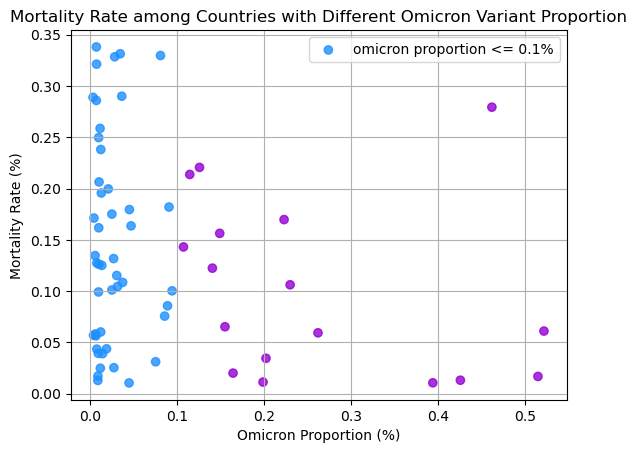

In [218]:
### plot

fig, ax = plt.subplots()
#colors = ['dodgerblue' if i<0.25 else 'slateblue' if i<0.5 else 'rebeccapurple' if i<0.75 else 'darkviolet' for i in country_death_confirm_population['Omicron Prop (%)']]

# drop the outliners
country_death_confirm_population_2 = country_death_confirm_population.sort_values('Mortality Rate (%)', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_confirm_population_2 = country_death_confirm_population_2.sort_values('Mortality Rate (%)').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_confirm_population_2 = country_death_confirm_population_2.sort_values('Omicron Prop (%)', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_confirm_population_2 = country_death_confirm_population_2.sort_values('Omicron Prop (%)').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])


colors = ['dodgerblue' if i<0.1 else'darkviolet' for i in country_death_confirm_population_2['Omicron Prop (%)']]
plot = plt.scatter(x = country_death_confirm_population_2['Omicron Prop (%)'], y = country_death_confirm_population_2['Mortality Rate (%)'], color = colors, alpha = 0.8)
ax.grid(True)
ax.set_xlabel('Omicron Proportion (%)')
ax.set_ylabel('Mortality Rate (%)')
ax.legend([plot], ['omicron proportion <= 0.1%'])
plt.title('Mortality Rate among Countries with Different Omicron Variant Proportion')
plt.show()

For each individual observation (country), the x variable is the omicron proportion and the y variable is the mortality rate.

The graph above provides an inituitive relation between a country's mortality rate and its omicron proportion. We can tell the distribution is shaped similarly to a negative log function or *a typical exponential distribution*. This allows us to conclude.

From the data given above, we can conclude the relation between the country's omicron proportion and its mortality rate as: 

**Most countries have both a low omicron proportion and a low mortality rate. Countries with a high omicron proportion tend to have a low mortality rate, and countries with a low omicron proportion tend to have a more unstable mortality rate distribution.**

[clicke here to return to the outline.](#outline)

<br>


<br>



<br>


------
# **Project Two**

*$\color{gray}{\text{ "Economic factors play important roles regarding the global COVID-19 mortality rate variation among countries." }}$*


So far, we have answered the following research questions in [project one](#project-one):

- [Do there exist similar trends between confirmation count and mortality rate? How about the death count and mortality rate?](#project-one-COVID-19-mortality-rate,-confirmation-count-and-death-count)

- [Does the mortality rate vary among countries?](#project-one-mortality-rate-in-different-countries)

- [What is the relation between GDP per capita and the COVID-19 mortality rate?](#project-one-the-relation-between-gdp-per-capita-and-mortality-rate)

- [Do countries with higher omicron variant proportions have a higher mortality rate?](#project-one-omicron-variant-proportion-and-the-mortality-rate)

*As a personal goal of this new project, I expect myself to write cleaner codes with improved efficiency.*

<br>

## **The Message**

As an answer to project one, economic factors such as GDP per capita result in variation in the mortality rate. For example, we have Peru with 665.53 mortality cases over 100,000 population, yet we have Burudi with a COVID-19 mortality rate of 0.1% $^{(8)}$. Thus as this is an economic course, I wonder what other **economic factors** will result in the variation in COVID-19 mortality rate. Thus, let us further specify the initial research question into the main message of project two:

*$\color{blue}{\text{ "Economic factors play important roles regarding the global COVID-19 mortality rate variation among countries." }}$*

As the message encodes, we will focus on the mortality change related to economic factors. The X-variables are the **economic factors** of a country, and the Y-variable is the **mortality rate**. Moreover, we will specify the mortality rate in countries with high and low population. Let us specify the message into the following sub-sections:

- [**The role of GDP regarding the mortality rate variation among countries**](#the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

- [**The role of the governmental mode regarding the mortality rate variation among countries**](#the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)

- [**The role of literacy rate regarding the mortality rate variation among countries**](#the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

<br>

#### **The role of GDP regarding the mortality rate variation among countries**

We have researched the role of **GDP per capita** concerning the COVID-19 mortality rate in project one. The conclusion is:

*Countries with low GDP per capita have the lowest mortality rate. Countries with the highest GDP per capita have the second lowest mortality rate, and countries with medium GDP per capita have the highest mortality rate.*

<br>

Thus as another well-known economic factor, project two will start by showing how a country's **GDP** affects its COVID-19 mortality rate.

**Message**

*In countries with large population, as the GDP increases, the mortality rate tends to decrease. Its trendline is more inelastic than less populated countries, as well as it has more outliners in both GDP and mortality rate.*

*On the other hand, in countries with a small population, an GDP increases raise the mortality rate. Countries with a small population also tend to have a lower mortality rate and GDP.*

**Content**
- Data Cleaning: [here](#data-cleaning-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
- Summary Statistics Table: [here](#summary-statistics-table-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)
- Plots: [here](#plots-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries)

<br>

#### **The role of the governmental mode regarding the mortality rate variation among countries**

Governmental mode is an important categorical factor resulting in mortality rate variation among countries, as it determines essential quarantine policies directly. My personal experience also suggests that in countries with a more dictatorial government (China), the overall quarantine enforcement policy is much stricter than in countries with a more democratic government. Thus with the *Democracy-Dictatorship index*, we found the relations between the governmental mode and the COVID-19 mortality rate in both the more populated and less populated countries.

**Message**

*In countries with a higher population, parliamentary democratic governments minimize the mortality rate and military dictatorship governments maximize the mortality rate. On the other hand, in countries with a lower population, royal dictatorship governments minimize the mortality rate, and civilian dictatorship governments maximize the mortality rate.*

**Content**
- Data Cleaning: [here](#data-cleaning-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
- Summary Statistics Table: [here](#summary-statistics-table-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)
- Plot: [here](#plot-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries)

<br>

#### **The role of literacy rate regarding the mortality rate variation among countries**

Another crucial economic factor regarding the mortality rate of a country is its **literacy rate**, as a higher literacy rate is resulted from better public education, which directly improves public health through educating people and indirectly through having more medical staff.

**Message**
*Both high-population countries and low-population countries share a similar decreasing trend: an increase in the literacy rate decreases the mortality rate. However, the difference is not relatively significant.*

**Content**
- Data Cleaning: [here](#data-cleaning-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)
- Summary Statistics Table: [here](#summary-statistics-table-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)
- Plot: [here](#plots-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

<br>

-----
### Project Two: **Data Cleaning**

The data sets are loaded in the beginning [here](#data-set-loading).
The data sets we have now are:

- *global_confirm*: the global COVID-19 confirmation count data. 

- *global_death*: the global COVID-19 mortality count data.

- *population*: the global population data.

- *GDP*: the global gdp per capita data

- *variants*: the COVID-19 variant count data.

We will use some of these existing data sets and add more later. 

<br>

#### Data Cleaning: The role of GDP regarding the mortality rate variation among countries

In [219]:
# country_confirm: cumulative confirmation count data
country_confirm = global_confirm.loc[:,['Country/Region','2/28/23']]
country_confirm = country_confirm.rename({'Country/Region':'Country', '2/28/23':'Cumulative Confirmation'},axis=1).dropna()

# country_death: cumulative mortality case data
country_death = global_death.loc[:, ['Country/Region', '2/28/23']]
country_death = country_death.rename({'Country/Region':'Country', '2/28/23':'Cumulative Death'}, axis=1).dropna()

# merge two data sets to calculate the mortality rate
country_mortality_rate = pd.merge(country_confirm, country_death, on='Country', how='inner')
country_mortality_rate = country_mortality_rate.groupby('Country').sum()
country_mortality_rate['Mortality Rate (%)'] = (country_mortality_rate['Cumulative Death'] / country_mortality_rate['Cumulative Confirmation']) * 100

# merge data with population
population = population.rename({'Country/Region':'Country', '2022 [YR2022]':'Population'}, axis=1)
country_mortality_rate = pd.merge(country_mortality_rate, population, on='Country', how='inner')

# type conversion
country_mortality_rate['Population'] =  country_mortality_rate['Population'].astype(int)

Now we should get a data set with the country name, cumulative confirmation count, cumulative mortality count and mortality rate based on it. Now let us merge it with the GDP data from the world bank.

##### Merge with GDP Data

In [220]:
# read the csv
country_GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv', on_bad_lines='skip')

# clean and merge
country_GDP = country_GDP.loc[:,['Country Name', '2021']].dropna().rename({'Country Name':'Country', '2021':'GDP'},axis=1)
country_MR_GDP = pd.merge(country_mortality_rate, country_GDP, on='Country', how='inner').dropna()

Now we should get *country_MR_GDP* as a dataset with Country Name, Cumulative Confirmation Count, Cumulative Death Count, Mortality Rate (in percentage %), Population and GDP.

Remember for this project, we group countries into high and low populations.

Let us first define what is a **"High population"**. 

We have to define the standard as Google shows no credible resource on the answer. We first exclude countries with the top 10% population and the bottom 10% population (to stabilize the variance), then take the mean and round up to an int type.

In [221]:
# define the population standard
df = country_mortality_rate.sort_values('Population', ascending=False).reset_index(drop=True).iloc[17:170-17,:].reset_index(drop=True)
pop_standard = int(df['Population'].mean())
print(pop_standard)

14049687


This allows us to define the following terms for this project:

> $\color{red}{\text{High Population}}$: Countries with a population higher than 14049687 is considered high population, which is the mean for the data set population without the 10% edge values (no top 10% population & no bottom 10% population).

> $\color{red}{\text{Low Population}}$: Countries that are not considered to have a high population.

*Note: the top 10% and the bottom 10% are excluded only for population standard calculation. They are still a part of the data set.*

Let us move to the plot [here](#data-cleaning-the-role-of-gdp-regarding-the-mortality-rate-variation-among-countries).

<br>

#### Data Cleaning: The role of the governmental mode regarding the mortality rate variation among countries

In [222]:
# load data sets
govt = pd.read_csv('Democracy-Dictatorship_Index.csv', on_bad_lines='skip')
country_codes = pd.read_csv('wikipedia-iso-country-codes.csv', on_bad_lines='skip')

Unfortunately, the dictatorship index data set is written in country codes. Thus we have first to merge it with the country code data set.

In [223]:
# loop population status among countries
for i in range(len(country_mortality_rate)):
    if int(country_mortality_rate.loc[i, 'Population']) >= pop_standard:
        country_mortality_rate.loc[i, 'Population Status'] = 'High'
    else:
        country_mortality_rate.loc[i, 'Population Status'] = 'Low'

# merge
df = pd.merge(govt, country_codes, left_on='Regime', right_on='Alpha-3 code', how='inner')

# select the columns necessary
if 'Regime' in df:
    df = df.loc[:, ['Type', 'Subtype', 'English short name lower case']]

# rearrange columns and rename
df = df[['English short name lower case', 'Type', 'Subtype']].rename(columns={'English short name lower case':'Country'})

# merge mortality rate data set with dictatorship index
country_MR_govt = pd.merge(country_mortality_rate, df, on='Country', how='inner')
country_MR_govt = country_MR_govt.rename(columns={'Type':'Governmental Type'})

# rearrange order and cut off
country_MR_govt = country_MR_govt[['Country', 'Population Status', 'Governmental Type', 'Subtype', 'Mortality Rate (%)']]

Now we have merged three data set to get what we want. 

The *country_MR_govt* data set contains Country name, Population status, Governmental type, Subtype, Mortality Rate.

Let us go to the plot [here](#plot-the-role-of-the-governmental-mode-regarding-the-mortality-rate-variation-among-countries).

<br>

#### Data Cleaning: The role of literacy rate regarding the mortality rate variation among countries

In [224]:
# read the data set
LR = pd.read_csv('API_SE.ADT.LITR.ZS_DS2_en_csv_v2_4900230.csv', on_bad_lines='skip')
LR = LR.loc[:, ['Country Name', '2021']].dropna().reset_index(drop=True)

# merge the data sets
country_LR_MR = pd.merge(country_mortality_rate, LR, left_on='Country', right_on='Country Name', how='inner')
country_LR_MR = country_LR_MR[['Country', 'Population Status', 'Mortality Rate (%)', '2021']]
country_LR_MR = country_LR_MR.rename(columns={'2021':'Literacy Rate (%)'})

At this point, the *LR* data set, which stands for *Literacy Rate*, should contains Country name, Population status, Mortality rate, Literacy rate.

Let us visualize plot [here](#plots-the-role-of-literacy-rate-regarding-the-mortality-rate-variation-among-countries)

<br>

-----
### Project Two: **Plots**

#### Plots: The role of GDP regarding the mortality rate variation among countries

As a project for an economic course, we should all know the difference between *GDP per capita* and *GDP*. Although their names are similar, *GDP per capita* is a measurement of individual wealth and *GDP* is a measrement of national aggregate output. 

For this part, we analyze the relation between *a countries's aggregate development* in respect to the COVID-19 mortality rate (instead of individual wealth analyzed in project one). My hypothesis is that countries with higher GDP could have a lower mortality rate as they have more public health funding, vice versa.

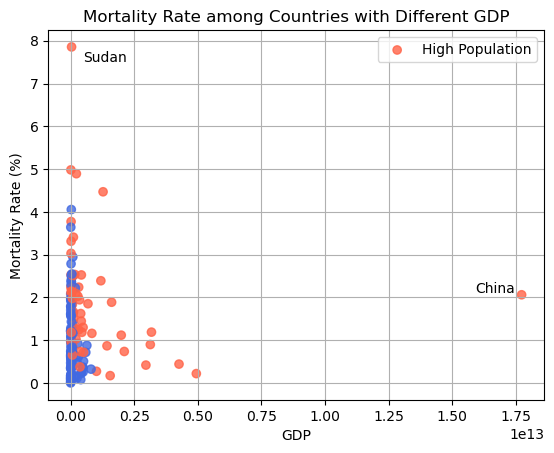

In [225]:
# define population status for the entire data set
for i in range(len(country_MR_GDP)):
    if int(country_MR_GDP.loc[i,'Population']) >= pop_standard:
        country_MR_GDP.loc[i, 'Population Status'] = 'High'
    else:
        country_MR_GDP.loc[i, 'Population Status'] = 'Low'

# plotting
fig, ax = plt.subplots()
colors = ['tomato' if i=='High' else 'royalblue' for i in country_MR_GDP['Population Status']]
plt.scatter(x=country_MR_GDP['GDP'], y=country_MR_GDP['Mortality Rate (%)'],color=colors,alpha=0.8)
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('GDP')
plt.title('Mortality Rate among Countries with Different GDP')
ax.text(15900000000000,2.1,'China')
ax.text(500000000000, 7.5, 'Sudan')
ax.legend(['High Population'])
plt.autoscale()
plt.show()

> Note: the outliners **ARE MOVED** later!!!

Before we set the limit, we can see **countries with high population** has two outliners:

**China**, with its extremely high GDP and **Sudan**, with its extremely high mortality rate.

The outliners are making the graph too compact. Let us now set limits for the graph and find the trend.

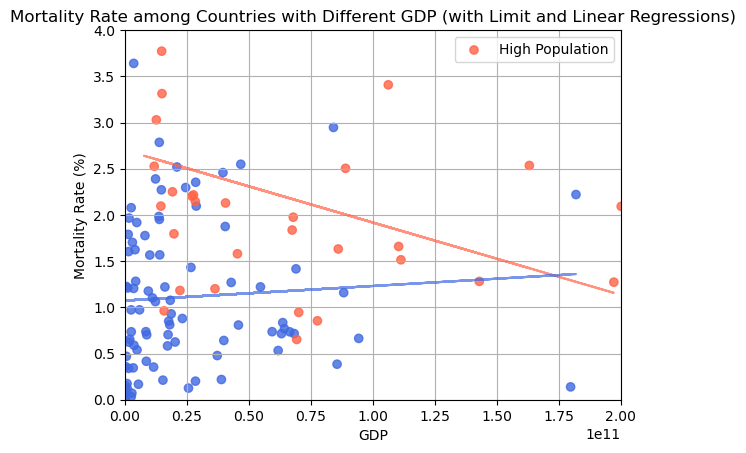

In [226]:
# define population status for the entire data set
for i in range(len(country_MR_GDP)):
    if int(country_MR_GDP.loc[i,'Population']) >= pop_standard:
        country_MR_GDP.loc[i, 'Population Status'] = 'High'
    else:
        country_MR_GDP.loc[i, 'Population Status'] = 'Low'

# plotting
fig, ax = plt.subplots()
colors = ['tomato' if i=='High' else 'royalblue' for i in country_MR_GDP['Population Status']]
plt.scatter(x=country_MR_GDP['GDP'], y=country_MR_GDP['Mortality Rate (%)'],color=colors,alpha=0.8)
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('GDP')
ax.legend(['High Population'])

# limits go here
xlim = 200000000000
ylim = 4
ax.set_xlim(0,xlim)
ax.set_ylim(0,ylim)

# linear regreesion for high population
df_high = country_MR_GDP[(country_MR_GDP['GDP']<=xlim) & (country_MR_GDP['Population Status']=='High')]
coef_high = np.polyfit(df_high['GDP'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['GDP'], poly1d_fn_high(df_high['GDP']), color = 'tomato', alpha=0.7)

# linear regression for low population
df_low = country_MR_GDP[(country_MR_GDP['GDP']<=xlim) & (country_MR_GDP['Population Status']=='Low')]
coef_low = np.polyfit(df_low['GDP'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['GDP'], poly1d_fn_low(df_low['GDP']), color = 'royalblue', alpha=0.7)

# set title
plt.title('Mortality Rate among Countries with Different GDP (with Limit and Linear Regressions)')
plt.show()

Let us first recall the definition of mortality rate from project one:

> $\color{red}{\text{ COVID-19 Mortality Rate of a Country}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality in a country.

Or, in plain language:

> $\color{red}{\text{ COVID-19 Mortality Rate of a Country (Plain)}}$: "if I am sick in this country, by what probability, will I die from it?"

The graph above excludes the extreme values and takes linear regression for both high-population and low-population countries **automatically**. Feel free to download the .jpynb version from GitHub here and play around with it (line 17).

> GitHub: https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git

The graph allows concluding that in **most countriess with a high population**, the mortality rate tends to decrease as the GDP increases. Vice versa, **in countries with a low population**, an GDP increases raises the mortality rate. The trendline in high-population countries is more inelastic than low population countries.

Moreover, countries with a low population tend to have **a lower average mortality rate and GDP** than countries with high population. These observations make sense as less populated countries have less labour force, resulting in a lower domestic output. Combine with the trend; a lowered GDP brings a reduced mortality rate.

Don't forget our observation from the graph before the limit: **more populated countries also tend to have more outliner in GDP and mortality rate**.

<br>

#### Plot: The role of the governmental mode regarding the mortality rate variation among countries

In [227]:
# high population countries
H_CivilianDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                         (country_MR_govt['Subtype']=='Civilian Dictatorship')]['Mortality Rate (%)'].mean()
H_MilitaryDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                         (country_MR_govt['Subtype']=='Military Dictatorship')]['Mortality Rate (%)'].mean()
H_ParliamentaryDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                           (country_MR_govt['Subtype']=='Parliamentary Democracy')]['Mortality Rate (%)'].mean()
H_PresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                          (country_MR_govt['Subtype']=='Presidential Democracy')]['Mortality Rate (%)'].mean()
H_RoyalDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                      (country_MR_govt['Subtype']=='Royal Dictatorship')]['Mortality Rate (%)'].mean()
H_SemiPresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                              (country_MR_govt['Subtype']=='Semi-Presidential Democracy')]['Mortality Rate (%)'].mean()

# low population countries
L_CivilianDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                         (country_MR_govt['Subtype']=='Civilian Dictatorship')]['Mortality Rate (%)'].mean()
L_MilitaryDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                         (country_MR_govt['Subtype']=='Military Dictatorship')]['Mortality Rate (%)'].mean()
L_ParliamentaryDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                           (country_MR_govt['Subtype']=='Parliamentary Democracy')]['Mortality Rate (%)'].mean()
L_PresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                          (country_MR_govt['Subtype']=='Presidential Democracy')]['Mortality Rate (%)'].mean()
L_RoyalDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                      (country_MR_govt['Subtype']=='Royal Dictatorship')]['Mortality Rate (%)'].mean()
L_SemiPresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                              (country_MR_govt['Subtype']=='Semi-Presidential Democracy')]['Mortality Rate (%)'].mean()

# create a new DataFrame to store the data
subtype_govt = pd.DataFrame({
    'Civilian Dictatorship': [H_CivilianDictatorship, L_CivilianDictatorship],
    'Military Dictatorship': [H_MilitaryDictatorship, L_MilitaryDictatorship],
    'Parliamentary Democracy': [H_ParliamentaryDemocracy, L_ParliamentaryDemocracy],
    'Presidential Democracy': [H_PresidentialDemocracy, L_PresidentialDemocracy],
    'Royal Dictatorship': [H_RoyalDictatorship, L_RoyalDictatorship],
    'Semi-Presidential Democracy': [H_SemiPresidentialDemocracy, L_SemiPresidentialDemocracy]
}, index = ['High Population', 'Low Population']
)

# calculate the mean for both population status
high_mean = subtype_govt.loc['High Population',:].mean()
low_mean = subtype_govt.loc['Low Population',:].mean()

This should give us a DataFrame that provides the mortality rate mean of each government subtype. Now let us plot the graph for **low and high populations** to compare the difference.

To plot, we will further categorize governmental modes into six categories: **Civilian Dictatorship, Military Dictatorship, Parliamentary Democracy, Presidential Democracy, Royal Dictatorship, Semi-Presidential Democracy.**

A government with a **civilian dictatorship** are ruled by dictators who do not derive their powers from the military. For example, Afghanistan, Angola, etc.

A government with a **military dictatorship** are ruled by dictators who holds the military powers. For example, Botswana, Burkina Faso, etc.

A **parliamentary democracy** system is a system of democratic governance of a state where the executive derives its democratic legitimacy from its ability to command the support of the legislature, typically a parliament, to which it is accountable. For example, Germany, India, etc

A **presidential democracy** system is defined by the separation of the executive branch from other aspects of government. The head of government is elected to work alongside, but not as a part of, the legislature. There are several types of powers that are traditionally delegated to the president. For example, the Indonesia, Argentina, etc.

A **royal dictatorship** is a system ruled by "royal" members. For example, Bahrain, Cambodia, etc.

A **semi-presidential democracy** is a system in which a president exists alongside a prime minister and a cabinet, with the latter two being responsible to the legislature of the state. For example, Ireland, Kyrgyzstan, etc.

For countries with high population, I would expect **royal dictatorial** countries to have the lowest mortality rate as they usually have the strictest epidemic enforcement; on the other hand, I would expect **presidential democratic** to have the highest mortliayt rate as the presidents can make irresponsible rules to win the votes.

For countries with low population, I expect **royal dictatorial** countries to have the lowest mortality rate for the same reason. I would expect **civilian dictatorial** government to have the highest mortality rate as this governmental mode usually do not care about their citizens in small countries.

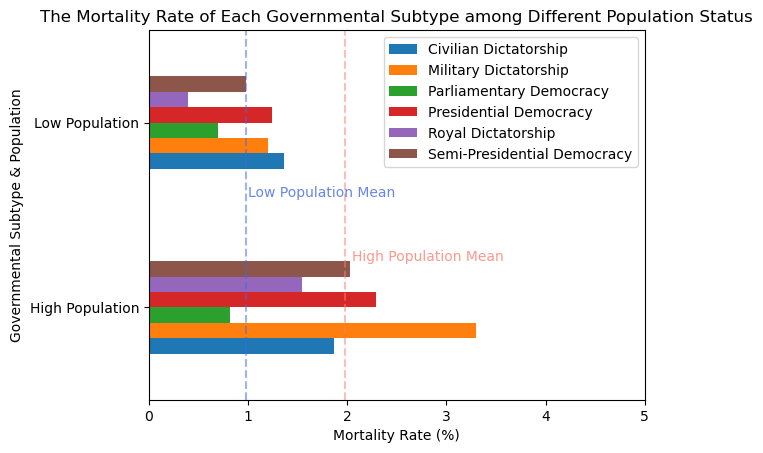

In [228]:
# plotting
fig, ax = plt.subplots()
subtype_govt.plot.barh(ax=ax)
ax.set_xlim(0,5)
plt.title('The Mortality Rate of Each Governmental Subtype among Different Population Status')
ax.set_xlabel('Mortality Rate (%)')
ax.set_ylabel('Governmental Subtype & Population')

# plot the mean for each population
plt.axline(xy1=[high_mean,0],xy2=[high_mean,2],color='salmon', alpha=0.5, ls='--')
plt.axline(xy1=[low_mean,0], xy2=[low_mean,2], color='royalblue', alpha=0.5, ls='--')
ax.text(2.05,0.25,'High Population Mean', color='salmon', alpha=0.8)
ax.text(1,0.6,'Low Population Mean', color='royalblue', alpha=0.8)
plt.show()

The graph above gives the mortality rate means among different governmental subtypes of varying population. From the graph, we can tell that **in countries with a lower population**, the **royal dictatorship** governmental mode results in the lowest mortality rate and **civilian dictatorship** governments bring the highest mortality rate. **In countries with a higher population**, the **parliamentary democratic** governments minimize the mortality rate, and the highest mortality rates are result of **military dictatorship** governments. Moreover, we see that countries with a higher population have a higher overall mortality rate mean than countries with a lower population.

<br>

#### Plots: The role of literacy rate regarding the mortality rate variation among countries

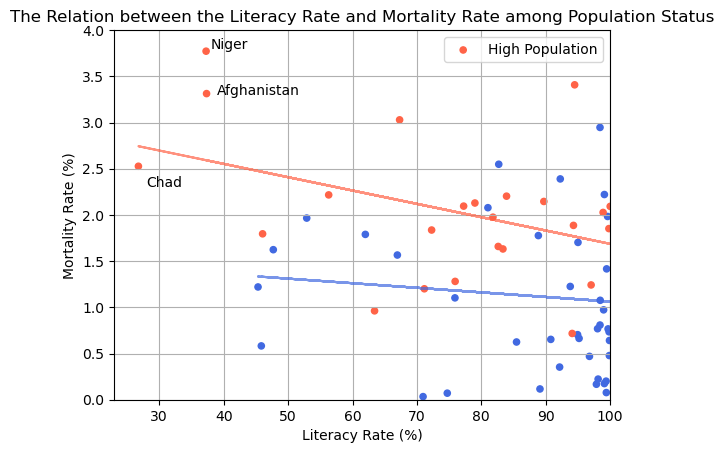

In [229]:
# plotting
fig, ax = plt.subplots()
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('Literacy Rate (%)')

# coloring and plotting
colors = ['tomato' if i=='High' else 'royalblue' for i in country_LR_MR['Population Status']]
country_LR_MR.plot.scatter(ax=ax, x='Literacy Rate (%)', y='Mortality Rate (%)', color=colors)

# limits go here
ax.set_xlim(23,100)
ax.set_ylim(0,4)

# linear regreesion for high population
df_high = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='High')]
coef_high = np.polyfit(df_high['Literacy Rate (%)'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['Literacy Rate (%)'], poly1d_fn_high(df_high['Literacy Rate (%)']), color = 'tomato', alpha=0.7)

# linear regression for low population
df_low = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='Low')]
coef_low = np.polyfit(df_low['Literacy Rate (%)'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['Literacy Rate (%)'], poly1d_fn_low(df_low['Literacy Rate (%)']), color = 'royalblue', alpha=0.7)

# styling
plt.grid(True)
ax.legend(['High Population'])
ax.text(28, 2.3, 'Chad')
ax.text(38, 3.8, 'Niger')
ax.text(39, 3.3, 'Afghanistan')
plt.title('The Relation between the Literacy Rate and Mortality Rate among Population Status')
plt.show()

> The lower bound of the X-axis is set to be 23 as no country with a literacy rate below 23.

With the current X and Y interval, we see a similar trend between the literacy and mortality rates among two population statuses. However, we do see **countries with a high population** having more outliner in the literacy rate. For example, we can see Chad's literacy rate of 26.76% and a mortality rate of 2.5267% at the very left side of the plot. However, let us modify the x_lim and the y_lim to move further into the distribution hotspot to analyze the trend further.

<br>

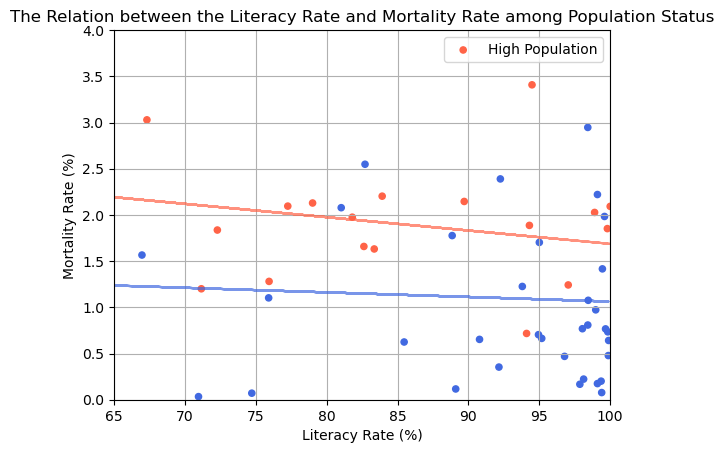

In [230]:
# plotting
fig, ax = plt.subplots()
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('Literacy Rate (%)')

# coloring and plotting
colors = ['tomato' if i=='High' else 'royalblue' for i in country_LR_MR['Population Status']]
country_LR_MR.plot.scatter(ax=ax, x='Literacy Rate (%)', y='Mortality Rate (%)', color=colors)

# limits go here
ax.set_xlim(65,100)
ax.set_ylim(0,4)

# linear regreesion for high population
df_high = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='High')]
coef_high = np.polyfit(df_high['Literacy Rate (%)'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['Literacy Rate (%)'], poly1d_fn_high(df_high['Literacy Rate (%)']), color = 'tomato', alpha=0.7)

# linear regression for low population
df_low = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='Low')]
coef_low = np.polyfit(df_low['Literacy Rate (%)'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['Literacy Rate (%)'], poly1d_fn_low(df_low['Literacy Rate (%)']), color = 'royalblue', alpha=0.7)

# styling
plt.grid(True)
ax.legend(['High Population'])
plt.title('The Relation between the Literacy Rate and Mortality Rate among Population Status')
plt.show()

The graph above includes linear regression automation for both population statuses. Feel free to download the .jpynb version from GitHub here and play around with it (line 17).

> GitHub: https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git

After moving into the distribution hotspot, the trendlines of both **high and low population** remain relatively similar. Thus, we conclude that countries with high population shares a same decreasing trend with countries with a low population, which is an increase in the literacy rate decreases the mortality rate. However, the difference is not relatively significant.

This is reasonable as a higher literacy rate implies better public education, which leads to a better overall public health, thus decreasing the mortality rate.

<br>

-----
## Maps and Interpretations

In this section, we are going to focus on the message 

*$\color{blue}{\text{ "The role of GDP regarding the variation in the COVID-19 mortality rate among countries." }}$*

We select this as the previous plots show interesting linear regressions between the variables among subgroups. 

Before the detailed mapping, let us get a convenient data set. Let us begin with reading the csv.

In [231]:
# read the population csv
pop = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')

Then, let us merge it with the other data sets.

#### Merging with New Data Sets

To get our target data set for mapping, we will merge the following data sets into one:

confirmation count data, mortality count data, GDP data, population, more precise location data

> Note: The **Y-variable** (Mortality Rate) is calculated based on the first two data sets.

We have merged the data sets in the previous section. However, since both the confirm count data and the mortality count data update daily, we merge again here.

In [232]:
# confirmation count data
confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirm = confirm.loc[:, ['Country/Region', 'Lat', 'Long', '3/1/23']].groupby('Country/Region').sum()
confirm = confirm.rename(columns={'3/1/23': 'Cumulative Confirm'}).dropna()

# mortality count data
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
death = death.loc[:, ['Country/Region', '3/1/23']].groupby('Country/Region').sum()
death = death.rename(columns={'3/1/23': 'Cumulative Death'}).dropna()

# GDP data
gdp_country = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv')
gdp_country = gdp_country.loc[:, ['Country Name', '2021']].rename(columns={'Country Name':'Country', '2021':'GDP'}).dropna()

# location data 
location = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')
location = location.loc[:, ['Country', 'Latitude', 'Longitude']]

# re-read the file to make sure there is no bug everytime we run this chunk
pop = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
pop = pop.loc[:, ['Country Name', '2021 [YR2021]']]
pop = pop.rename(columns={'Country Name': 'Country', '2021 [YR2021]': 'Population'}).dropna()

# let us begin to merge
df = pd.merge(confirm, death, on='Country/Region', how='inner')
df = pd.merge(df, gdp_country, left_on='Country/Region', right_on='Country', how='inner')
df = pd.merge(df, pop, left_on='Country', right_on='Country', how='inner')
df = pd.merge(df, location, left_on='Country', right_on='Country', how='inner')

# calculate the Y-variable
df['Mortality Rate (%)'] = (df['Cumulative Death'] / df['Cumulative Confirm']) * 100

# calculate the population status (defined before)
for i in range(len(df)):
    if int(df.loc[i,'Population']) >= pop_standard:
        df.loc[i, 'Population Status'] = 'High'
    else:
        df.loc[i, 'Population Status'] = 'Low'

mapping = df[['Country', 'Longitude', 'Latitude', 'Population Status', 'Mortality Rate (%)', 'GDP', 'Population', 'Cumulative Confirm', 'Cumulative Death']]
mapping = mapping.rename(columns={'Latitude':'Lat', 'Longitude':'Long'})

The *mapping* data set above should be the target mapping data set which includes the following:

Country name, Latitude and longitude, Population status (defined before)(**Y-variable subgroup standard**), Mortality rate (in percentage %)(**Y-variable**), GDP, Population, Cumulative confirm count and death count

However, due to some reason, the global confirmation count and global death count data sets do not have the US included. Let us add the US data mannually.

In [233]:
df = pd.DataFrame([['United States of America', 38, -97, 'High', 1.09087, 23320000000000, 331900000, 103000000, 1130000]], columns=['Country', 'Lat', 'Long', 'Population Status', 'Mortality Rate (%)', 'GDP', 'Population', 'Cumulative Confirm', 'Cumulative Death'])
if len(mapping) == 155:
    mapping = mapping.append(df).reset_index(drop=True)
    
# Long and Lat will be zipped and converted in the upcoming section

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_14623/1770075123.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mapping = mapping.append(df).reset_index(drop=True)


Now we have all the data for the USA. Let us move further.

<br>

-----
#### Map: Countries with Highest Mortality Rate

Let us first plot a distribution map for countries with the top mortality rate to see if there is any geographical factors resulting in the outliners.

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_14623/3885855547.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  gdf2 = gdf.dropna(0).sort_values('Mortality Rate (%)', ascending=False).head(num)


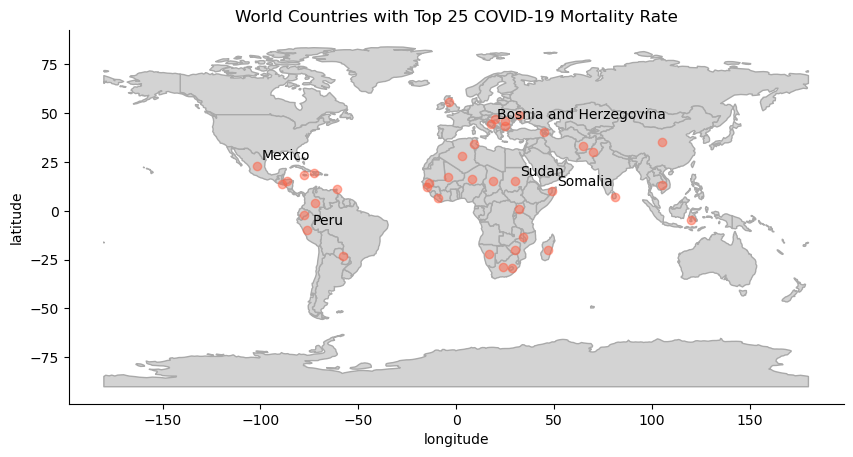

In [243]:
# copy the mapping data 
df = mapping.copy()

# read the world data and setting up the GeoDataFrame
quantile = mapping['Mortality Rate (%)'].quantile(.75)
df = df[df['Mortality Rate (%)'] >= quantile]
df.at[190,'Lat'] = 55.3781
df.at[190,'Long'] = -3.4360
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df['Coordinates'] = list(zip(df.Long, df.Lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# plotting 
fig, gax = plt.subplots(figsize = (10,8))
world.plot(ax=gax, edgecolor='darkgray',color='lightgray')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gdf.plot(ax=gax, color='tomato', alpha=0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('World Countries with Top 25 COVID-19 Mortality Rate')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# naming the top 5 GPD
num = 5
gdf2 = gdf.dropna(0).sort_values('Mortality Rate (%)', ascending=False).head(num)
for x, y, label in zip(gdf2['Coordinates'].x, gdf2['Coordinates'].y, gdf2['Country']):
   gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points', color = 'black')
plt.show()

Countries with the top 25 COVID-19 mortality rate are mostly distributed in **South America, Africa and East Europe**. There are also significant number of top GDP countries in **Southeast Asia**. However, countries with the top 5 mortality rate are evenly distributed in the Americas, Africa and East Europe. This also implies that there exist no significant geographical factor affecting the COVID-19 mortality rates.

<br>

#### Map: Mortality Rate Distribution Color Map with High GDP Countries

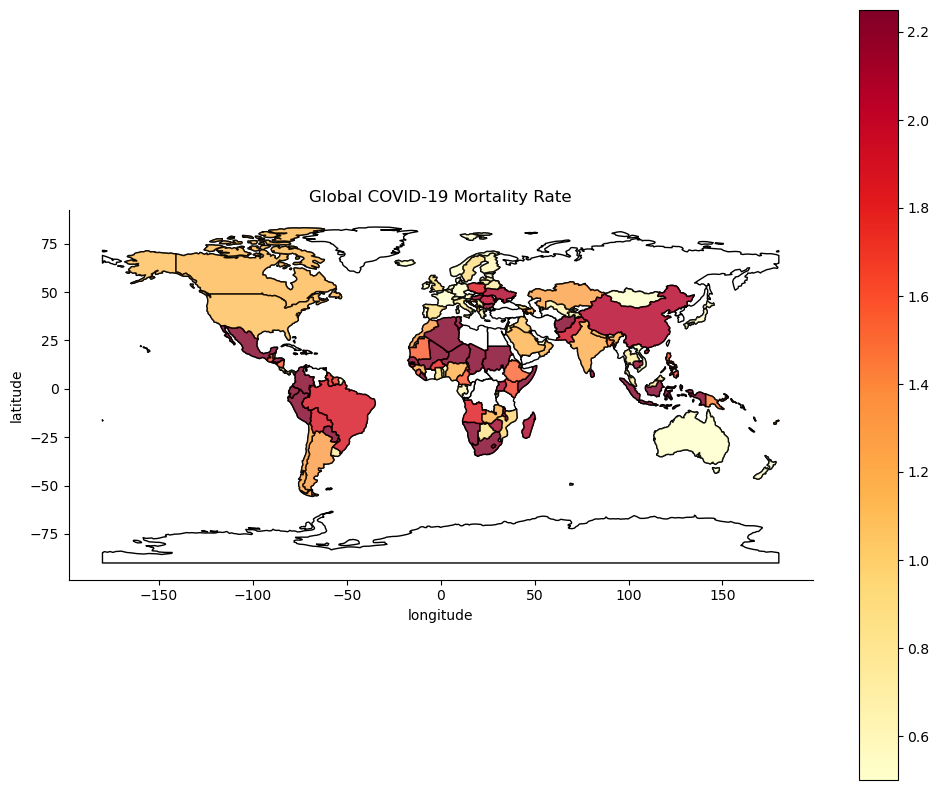

In [246]:
# setting up the GeoDataFrame
df = mapping.copy()
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geodf = world.merge(df, left_on = 'name', right_on = 'Country', how = 'inner')

# plotting
fig, gax = plt.subplots(figsize = (12,10))
world.plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
geodf.plot(
    ax=gax, edgecolor='black', column='Mortality Rate (%)', legend=True, cmap='YlOrRd', alpha=0.8,
    vmin=0.5, vmax=2.25
)
gax.set_title('Global COVID-19 Mortality Rate')
plt.show()

The color map above shows the **mortality rate distribution** between countries. We can tell that **in North America**, three major countries (Canada, USA, Mexico) have different COVID-19 mortality rate severity. The mortality rate is relatively lower in the upper part of North America and is mainly resuluting from the governmental mode and population density.

Compared to North America, **South America** tend to have a higher overall mortality rate with outliners such as Brazil. Its high mortality rate is mainly a result of pandemic policy failure. 

Overall, **European** countries tend to have a low mortality rate. However, East Europe has a significantly higher mortality rate than the rest.

Things start to turn sour in **Africa**; this continent contains many mortality rate hotspots. The mortality rate variation is higher than in any other continent. Although more developed countries in Africa such as South Africa tend to have a lower mortality rate compare to the hotspots, they still have a high mortality rate compared to the rest of the world.

**Asia** is another continent with a high variance. We can see Thailand and Vietnam with lower mortality rates, and countries such as China and Indonesia with higher mortality rates. This is a result of the difference in governmental modes among Asian countries.

**Oceania** tends to have a low mortality rate due to the geographic advantage.

<br>

#### Map: Mortality Rates in the US

##### Merging with New Data Sets

For this part, we are going to focus on the mainland USA, so we are ignoring the islands and Alaska for a better visual experience.

Since the US data are recorded in another data page, we should merge the following data into our target mapping data:

- US cumulative death count

- US cumulative confirmation count

- US GDP by state

- State polygon for plotting

> Again, the Y-value, **Mortality Rate**, is calculated using two data sets.

In [237]:
# loading data
US_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
US_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
US_GDP = pd.read_csv('SAGDP2N__ALL_AREAS_1997_2020.csv').dropna(0)
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

# cleaning up US_death
US_death = US_death.loc[:, ['Province_State', '3/1/23']]
US_death = US_death.groupby('Province_State').sum()
US_death = US_death.rename(columns={'3/1/23':'Cumulative Death'})

# cleaning up US_confirm
US_confirm = US_confirm.loc[:, ['Province_State', '3/1/23']]
US_confirm = US_confirm.groupby('Province_State').sum()
US_confirm = US_confirm.rename(columns={'3/1/23':'Cumulative Confirm'})

# query
df = pd.merge(US_death, US_confirm, on='Province_State', how='inner')
df['Mortality Rate (%)'] = (df['Cumulative Death'] / df['Cumulative Confirm']) * 100
state_df = state_df.query("NAME != 'Guam' & NAME != 'Alaska' & NAME != 'Northern Mariana Islands' & NAME != 'American Samoa' & NAME != 'Puerto Rico' & NAME != 'United States Virgin Islands' & NAME != 'Hawaii' & NAME != 'Commonwealth of the Northern Mariana Islands'")
USMR = pd.merge(state_df, df, left_on='NAME', right_on='Province_State', how='inner') 
USMR = USMR.drop(index=[1, 12, 13, 41])

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_14623/546145120.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  US_GDP = pd.read_csv('SAGDP2N__ALL_AREAS_1997_2020.csv').dropna(0)


The *USMR*, which stands for the United States Mortality Rate, should give us enough geographic information for the plot and coloring. It should contain the polygon information and other critical information such as the mortality rate among the states, names, etc.

Let us use it to plot.

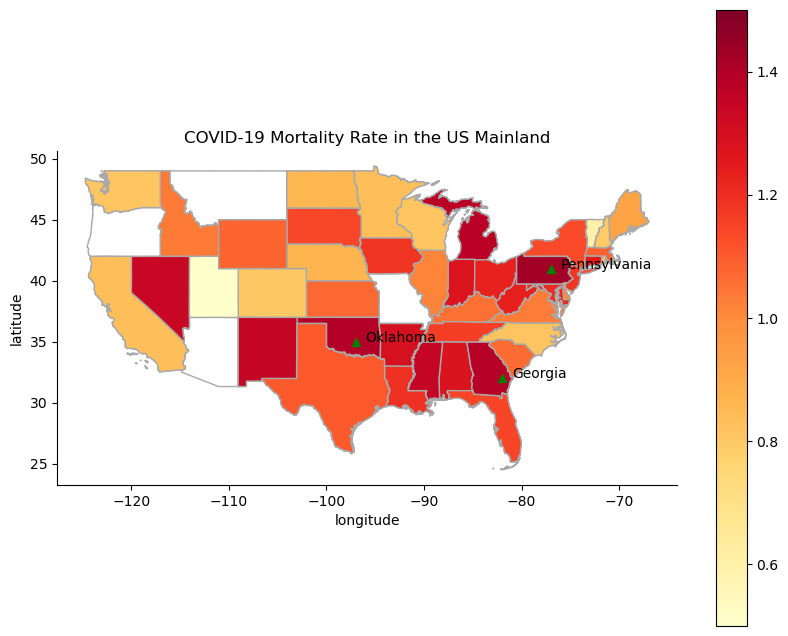

In [260]:
# plot the US mainland
fig, gax = plt.subplots(figsize=(10, 8))
state_df.plot(ax=gax, edgecolor='darkgray',color='white')

# coloring
USMR.plot(
    ax=gax, edgecolor='darkgray', column='Mortality Rate (%)', legend=True, cmap='YlOrRd',
    vmin=0.5, vmax=1.5
)

# detailing
plt.title('COVID-19 Mortality Rate in the US Mainland')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# add top three mortality rate
gax.plot(-77, 41, 'g^')
gax.plot(-97, 35, 'g^')
gax.plot(-82, 32, 'g^')
gax.text(-76, 41, 'Pennsylvania', color='black', size=10)
gax.text(-96, 35, 'Oklahoma', color='black', size=10)
gax.text(-81, 32, 'Georgia', color='black', size=10)

plt.show()

The graph above shows us the COVID-19 mortality mean among the US mainland states. The states with top three mortality rate are noted with green triangles. The graph shows that the overall COVID-19 mortality rate varies from west coast to east coast, where the situation in the eastern mainland is more severe. Coastal states tend to have a lower mortality rate too compare to continental states.

States with the top three mortality rates are distribution in **the central US** and **the east coast**, with two blues states and one red state.

<br>

------
## **Project Three**

------
## **Conclusion**

---
## **References**

**Data Source Reference:**

- *panelEnshengDongaHongruDuaLaurenGardneraEnvelope, A. links open overlay, EnshengDonga, a, HongruDua, &amp; LaurenGardneraEnvelope. (2020, February 19). An interactive web-based dashboard to track COVID-19 in Real time. The Lancet Infectious Diseases. Retrieved February 1, 2023, from https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub*

**Citation (APA7):**

1. *Covid-19 data explorer. Our World in Data. (n.d.). Retrieved February 3, 2023, from https://ourworldindata.org/explorers/coronavirus-data-explorer*
2. *Ontario's COVID-19 response: A history of announced measures, 2020-2022. JD Supra. (n.d.). Retrieved February 3, 2023, from https://www.jdsupra.com/legalnews/ontario-s-covid-19-response-a-history-1280608/*
3. *GDP per capita (current US$). Data. (n.d.). Retrieved February 3, 2023, from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*
4. *Key facts about Monaco. (n.d.). Retrieved February 3, 2023, from https://monacodc.org/monacohome.html*
5. *Encyclopædia Britannica, inc. (2023, January 4). Liechtenstein. Encyclopædia Britannica. Retrieved February 3, 2023, from https://www.britannica.com/place/Liechtenstein*
6. *Countries where COVID-19 has spread. Worldometer. (n.d.). Retrieved February 3, 2023, from https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/*
7. *Security violation. (n.d.). Retrieved February 3, 2023, from https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/a-new-strain-of-coronavirus-what-you-should-know*
8. Mortality analyses. Johns Hopkins Coronavirus Resource Center. (n.d.). Retrieved March 2, 2023, from *https://coronavirus.jhu.edu/data/mortality*